In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
import glob

Positive = glob.glob('archive/Positive/*.jpg') 
Negative = glob.glob('archive/Negative/*.jpg')

positiveImgs = np.zeros((20000,100,100))
negativeImgs = np.zeros((20000,100,100))
c = 0

In [3]:
for positive, negative in zip(Positive, Negative):
    posImg = cv2.imread(positive, 0)
    negImg = cv2.imread(negative, 0)
    posImg = cv2.GaussianBlur(posImg,(3,3),1)
    negImg = cv2.GaussianBlur(negImg,(3,3),1)
    ret,th1 = cv2.threshold(posImg,90,255,cv2.THRESH_BINARY_INV)
    ret,th2 = cv2.threshold(negImg,60,255,cv2.THRESH_BINARY_INV)
    img1 = cv2.resize(th1, (100, 100), interpolation = cv2.INTER_LINEAR)
    img2 = cv2.resize(th2, (100, 100), interpolation = cv2.INTER_LINEAR)
    img1 = img1.reshape(1, 100 , 100)
    img2 = img2.reshape(1, 100 , 100)
    positiveImgs[c] = img1
    negativeImgs[c] = img2
    c += 1

In [4]:
positiveLabel = np.ones((20000,1), int)
negativeLabel = np.zeros((20000,1), int)

In [5]:
imgs = np.append(positiveImgs, negativeImgs, axis = 0)

In [6]:
labels = np.append(positiveLabel, negativeLabel, axis = 0)

In [7]:
X , Y = shuffle(imgs,labels)

In [8]:
X = X.reshape(40000, 10000)
X = X.astype('float32') 

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.2)

In [10]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [11]:
predictions = svm_linear.predict(x_test)

In [12]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.98471875

In [13]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

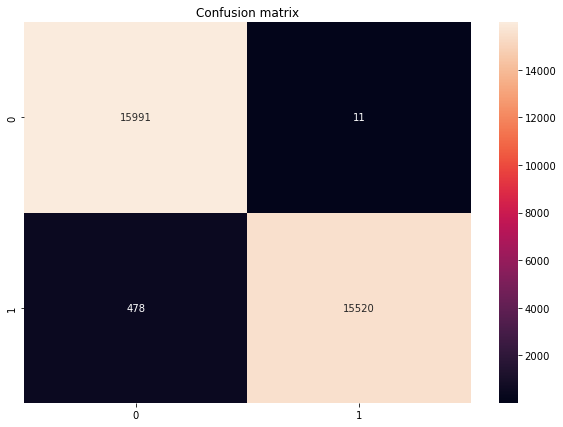

In [14]:
import pandas as pd
import seaborn as sns
df_cm = pd.DataFrame(confusion, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
plt.title("Confusion matrix")
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
sns.heatmap(df_cm, annot=True,fmt='d')

plt.show()

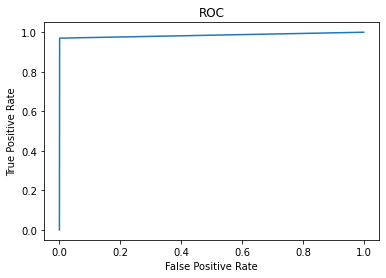

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()